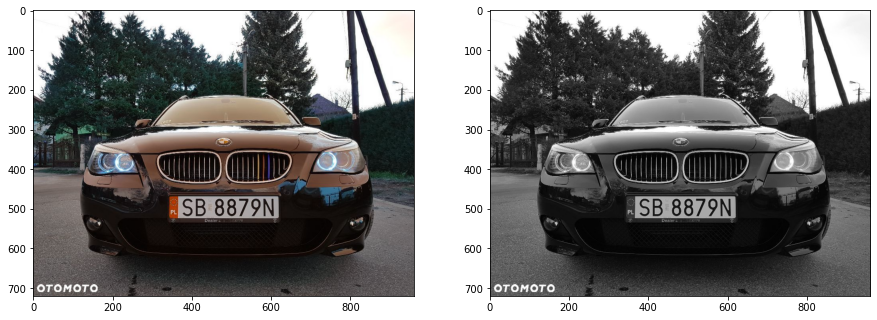

In [2]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import pytesseract

image = cv2.imread('img/0.jpg')       #wczytywanie zdjecia
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #usuniecie rgb w celu przyspieszenia dzialania programu

def plot_images(img1, img2):
    fig = plt.figure(figsize=[15,15]) #wielkosc obrazow
    ax1 = fig.add_subplot(1,2,1)   #(jeden rzad, dwie kolumny, kolumna pierwsza) 
    ax1.imshow(img1)

    ax2 = fig.add_subplot(1,2,2)   #(jeden rzad, dwie kolumny, kolumna druga) 
    ax2.imshow(img2, cmap='gray')
    
plot_images(image, gray) #porownanie obrazow

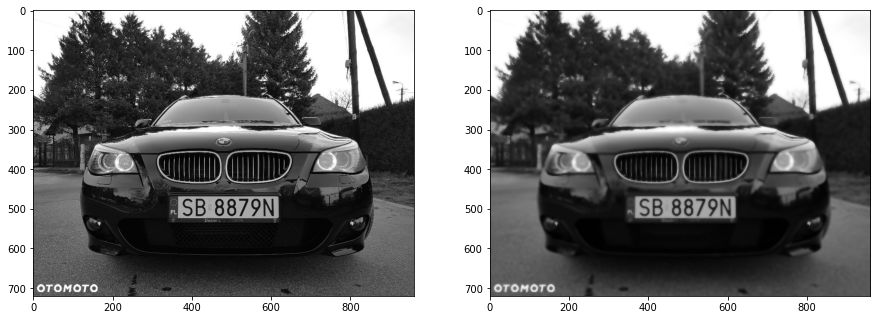

In [3]:
blur = cv2.bilateralFilter(gray, 10, 100, 100) # blurowanie obrazu

def plot_images(img1, img2):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,2,1)
    ax1.imshow(img1,cmap='gray')

    ax2 = fig.add_subplot(1,2,2)
    ax2.imshow(img2, cmap='gray')
    
plot_images(gray, blur)

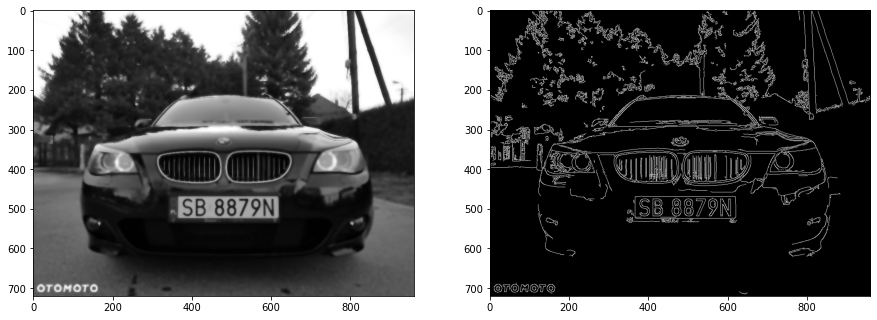

In [90]:
edges = cv2.Canny(blur, 15, 100) #wykrywanie krawedzi 
def plot_images(img1, img2):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,2,1)
    ax1.imshow(img1,cmap='gray')

    ax2 = fig.add_subplot(1,2,2)
    ax2.imshow(img2, cmap='gray')
    
plot_images(blur, edges)

1512


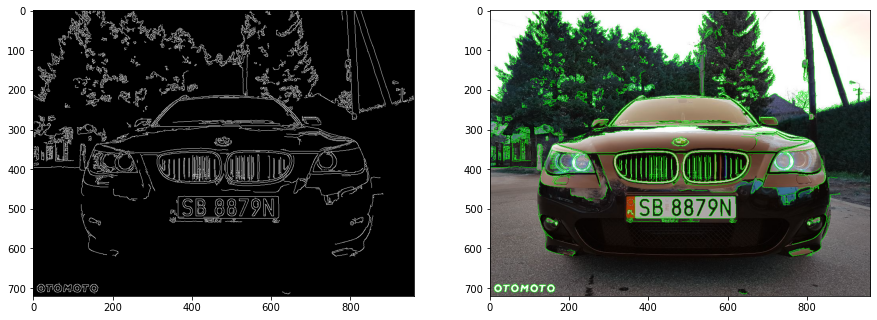

In [122]:
counters, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

image_copy = image.copy()
image_copy = cv2.drawContours(image_copy, counters, -1, (0,255,0),1)

def plot_images(img1, img2):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,2,1)
    ax1.imshow(img1,cmap='gray')

    ax2 = fig.add_subplot(1,2,2)
    ax2.imshow(img2, cmap='gray')
    
    
plot_images(edges, image_copy)

print(len(counters))

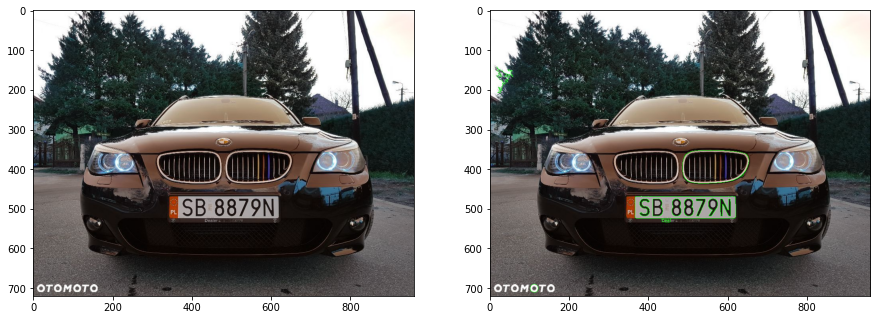

In [123]:
counters_new = sorted(counters, key=cv2.contourArea, reverse=True)[:20]   #wybiera najwieksze kontury

image_copy = image.copy()
image_copy = cv2.drawContours(image_copy, counters_new, -1, (0,255,0), 1)

def plot_images(img1, img2):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,2,1)
    ax1.imshow(img1,cmap='gray')

    ax2 = fig.add_subplot(1,2,2)
    ax2.imshow(img2, cmap='gray')
    
plot_images(image, image_copy)

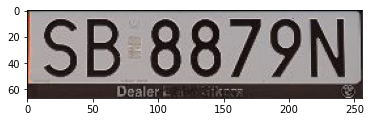

In [116]:
plate = None

for counter in counters_new:
    perimeter = cv2.arcLength(counter, True)
    edges_count = cv2.approxPolyDP(counter, 0.02 * perimeter, True) # helps in counting the number of edges in an image
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(counter)
        plate = image[y:y+h, x:x+w]
        break


cv2.imwrite("plate.png", plate)
result_plate=plt.imshow(plate)

In [117]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
car_number = pytesseract.image_to_string(plate, lang="eng")
print(car_number)

SB 8879N

